# Importamos las librerias

In [1]:
import pandas as pd
import geopandas as gdp
#from shapely 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

# Importamos las bases

comenzaremos por el análisis de Mapa de Oportunidades Comerciales (MOC)

In [11]:
aperturas = pd.read_csv('apertura.csv',delimiter=";")
aperturas.info()
aperturas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5210 entries, 0 to 5209
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   RUBRO         5210 non-null   object
 1   MOC_ZONAS_ID  5210 non-null   int64 
 2   AÑO           5210 non-null   int64 
 3   CUATRIMESTRE  5210 non-null   int64 
 4   NIVEL         5210 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 203.6+ KB


,RUBRO,MOC_ZONAS_ID,AÑO,CUATRIMESTRE,NIVEL
0,BARES Y CAFES,161,2016,3,1
1,COMIDA AL PASO,161,2016,2,1
2,FERRETERIA Y CONSTRUCCION,161,2016,1,1
3,FERRETERIA Y CONSTRUCCION,161,2016,2,1
4,FERRETERIA Y CONSTRUCCION,161,2016,3,1


In [12]:
cierre = pd.read_csv('cierre.csv',delimiter=";")
cierre.info()
cierre.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   RUBRO         3114 non-null   object
 1   MOC_ZONAS_ID  3114 non-null   int64 
 2   AÑO           3114 non-null   int64 
 3   CUATRIMESTRE  3114 non-null   int64 
 4   NIVEL         3114 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 121.8+ KB


,RUBRO,MOC_ZONAS_ID,AÑO,CUATRIMESTRE,NIVEL
0,BARES Y CAFES,4,2016,3,1
1,BARES Y CAFES,18,2016,1,1
2,BARES Y CAFES,20,2016,2,1
3,BARES Y CAFES,23,2016,2,1
4,BARES Y CAFES,24,2016,1,1


In [7]:
rubros = pd.read_csv('rubros.csv',delimiter=";")
rubros.info()
rubros.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2898 entries, 0 to 2897
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MOC_RUBROS_ID                  2898 non-null   int64  
 1   MOC_ZONAS_ID                   2898 non-null   int64  
 2   RUBRO                          2898 non-null   object 
 3   NIVEL_RIESGO                   2749 non-null   float64
 4   FACTURACION_PROM_ACTUAL        2728 non-null   float64
 5   INDICE_CRECIMIENTO             2712 non-null   float64
 6   INDICE_ESTABILIDAD             2749 non-null   float64
 7   INDICE_APERTURA                2898 non-null   float64
 8   INDICE_CIERRE                  2898 non-null   float64
 9   INDICE_SUPERVIVENCIA           2538 non-null   float64
 10  IND_AP_ACT_VS_IND_AP_ANIO_ANT  2067 non-null   float64
 11  IND_CL_ACT_VS_IND_CL_ANIO_ANT  1396 non-null   float64
 12  SUP_MENOS_1                    2785 non-null   f

,MOC_RUBROS_ID,MOC_ZONAS_ID,RUBRO,NIVEL_RIESGO,FACTURACION_PROM_ACTUAL,INDICE_CRECIMIENTO,INDICE_ESTABILIDAD,INDICE_APERTURA,INDICE_CIERRE,INDICE_SUPERVIVENCIA,...,SUP_MENOS_1,SUP_ENTRE_1_Y_2,SUP_ENTRE_2_Y_3,SUP_ENTRE_3_Y_4,SUP_ENTRE_4_Y_5,SUP_MAS_5,FACTURACION_PROM_ANIO_ANT,NIVEL_LOCALES,INDICE_CIERRE_ANIO_ANT,INDICE_APERTURA_ANIO_ANT
0,1,1,INSUMOS PARA EL HOGAR,5.0,1.0,3.0,1.0,0.0,16.67,0.0,...,0.0,10.00,45.00,15.00,0.00,30.00,2.0,1.0,16.67,16.67
1,2,2,INSUMOS PARA EL HOGAR,NaN,NaN,NaN,NaN,0.0,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,INSUMOS PARA EL HOGAR,1.0,4.0,4.0,2.0,0.0,0.00,100.0,...,0.0,18.18,27.27,27.27,27.27,0.00,4.0,1.0,NaN,33.33
3,4,4,INSUMOS PARA EL HOGAR,1.0,2.0,4.0,4.0,0.0,0.00,100.0,...,0.0,0.00,0.00,14.29,0.00,85.71,3.0,1.0,NaN,NaN
4,5,5,INSUMOS PARA EL HOGAR,NaN,NaN,NaN,NaN,0.0,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---------------------------------------------------------

In [10]:
zonas = pd.read_csv('zonas.csv',delimiter=";")
zonas.info()
zonas.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   MOC_ZONAS_ID                               161 non-null    int64  
 1   PK_TIEMPO_ID                               161 non-null    int64  
 2   POBLACION_FLOTANTE                         161 non-null    int64  
 3   POBLACION_VIVIENTE                         161 non-null    int64  
 4   POBLACION_TRABAJADORA                      161 non-null    int64  
 5   CANTIDAD_HOGARES                           161 non-null    int64  
 6   PRECIO_PROMEDIO_ALQUILER_LOCAL             154 non-null    float64
 7   PRECIO_MAX_ALQUILER_LOCAL                  154 non-null    float64
 8   PRECIO_MIN_ALQUILER_LOCAL                  154 non-null    float64
 9   SUPERFICIE_M2_PROMEDIO_ALQUILER            154 non-null    float64
 10  SUPERFICIE_M2_MAX_ALQUILER

,MOC_ZONAS_ID,PK_TIEMPO_ID,POBLACION_FLOTANTE,POBLACION_VIVIENTE,POBLACION_TRABAJADORA,CANTIDAD_HOGARES,PRECIO_PROMEDIO_ALQUILER_LOCAL,PRECIO_MAX_ALQUILER_LOCAL,PRECIO_MIN_ALQUILER_LOCAL,SUPERFICIE_M2_PROMEDIO_ALQUILER,...,RUBRO_MENOS_PREDOMINANTE,PRECIO_PROMEDIO_VENTA_LOCAL,PRECIO_MAX_VENTA_LOCAL,PRECIO_MIN_VENTA_LOCAL,SUPERFICIE_M2_PROMEDIO_VENTA,SUPERFICIE_M2_MAX_VENTA,SUPERFICIE_M2_MIN_VENTA,NIVEL_LOCALES_RUBRO_PREDOMINANTE,NIVEL_LOCALES_RUBRO_MENOS_PREDOMINANTE,FECHA
0,1,591673,3,6726,3732,2465,58128.80,162999.60,26000.00,322.26,...,HELADERIAS,1144213.52,2800000.0,25000.0,4918.06,7857.1,2720.6,1,1,2017-07-01 00:00:00.000
1,2,591673,5,589,348,255,34854.58,47068.93,20401.40,167.54,...,VETERINARIA,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2017-07-01 00:00:00.000
2,3,591673,2,10764,5967,3622,10606.00,13311.99,7900.00,120.67,...,INSTITUCIONES DEPORTIVAS,273333.33,550000.0,60000.0,1662.77,2200.0,1166.7,1,1,2017-07-01 00:00:00.000
3,4,591673,2,6690,3927,2379,25500.53,150000.00,6436.93,154.71,...,VETERINARIA,286636.36,530000.0,90000.0,1416.98,2323.2,679.5,1,1,2017-07-01 00:00:00.000
4,5,591673,5,623,246,154,28014.00,28014.00,28014.00,304.50,...,INSTITUCIONES DEPORTIVAS,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2017-07-01 00:00:00.000


In [9]:
demografia = pd.read_csv('demografia.csv',delimiter=";")
demografia.info()
demografia.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   MOC_DEMOGRAFIA_ID      2254 non-null   int64 
 1   MOC_ZONAS_ID           2254 non-null   int64 
 2   PK_RANGO_ETARIO_ID     2254 non-null   int64 
 3   PK_GENERO_ID           2254 non-null   int64 
 4   POBLACION_VIVIENTE     2254 non-null   int64 
 5   POBLACION_TRABAJADORA  2254 non-null   int64 
 6   RANGO_ETARIO           2254 non-null   object
 7   GENERO                 2254 non-null   object
dtypes: int64(6), object(2)
memory usage: 141.0+ KB


,MOC_DEMOGRAFIA_ID,MOC_ZONAS_ID,PK_RANGO_ETARIO_ID,PK_GENERO_ID,POBLACION_VIVIENTE,POBLACION_TRABAJADORA,RANGO_ETARIO,GENERO
0,1,1,6,0,504,374,[60-INF),H
1,2,1,1,0,338,61,[10-20),H
2,3,1,2,1,607,370,[20-30),M
3,4,1,0,0,478,0,[0-10),H
4,5,1,5,0,417,351,[50-60),H


Para este estudio, se deberá realizar dos join entre los datos que corresponden a rubros y caracteristicas de ellos y por otro lado los datos demograficos y de precios:

1er join:

*rubros

*apertura

*cierres

Por otro lado, los datos que corresponden a caracteristicas sociodemograficas y economicas:

*zonas

*demografia




--------------------------------------------
Comenzamos con los joins 

In [20]:
aperturas.columns

Index(['RUBRO', 'MOC_ZONAS_ID', 'AÑO', 'CUATRIMESTRE', 'NIVEL'], dtype='object')

In [21]:
cierre.columns

Index(['RUBRO', 'MOC_ZONAS_ID', 'AÑO', 'CUATRIMESTRE', 'NIVEL'], dtype='object')

In [22]:
rubros.columns

Index(['MOC_RUBROS_ID', 'MOC_ZONAS_ID', 'RUBRO', 'NIVEL_RIESGO',
       'FACTURACION_PROM_ACTUAL', 'INDICE_CRECIMIENTO', 'INDICE_ESTABILIDAD',
       'INDICE_APERTURA', 'INDICE_CIERRE', 'INDICE_SUPERVIVENCIA',
       'IND_AP_ACT_VS_IND_AP_ANIO_ANT', 'IND_CL_ACT_VS_IND_CL_ANIO_ANT',
       'SUP_MENOS_1', 'SUP_ENTRE_1_Y_2', 'SUP_ENTRE_2_Y_3', 'SUP_ENTRE_3_Y_4',
       'SUP_ENTRE_4_Y_5', 'SUP_MAS_5', 'FACTURACION_PROM_ANIO_ANT',
       'NIVEL_LOCALES', 'INDICE_CIERRE_ANIO_ANT', 'INDICE_APERTURA_ANIO_ANT'],
      dtype='object')

In [26]:
df_concatenado_cierre_aperturas = pd.concat([cierre, aperturas])
df_concatenado_cierre_aperturas.info()
df_concatenado_cierre_aperturas.head()

# No es optimo unificar ambos df, conviene analizar rubro de cierre y rubro de apertura

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8324 entries, 0 to 5209
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   RUBRO         8324 non-null   object
 1   MOC_ZONAS_ID  8324 non-null   int64 
 2   AÑO           8324 non-null   int64 
 3   CUATRIMESTRE  8324 non-null   int64 
 4   NIVEL         8324 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 390.2+ KB


,RUBRO,MOC_ZONAS_ID,AÑO,CUATRIMESTRE,NIVEL
0,BARES Y CAFES,4,2016,3,1
1,BARES Y CAFES,18,2016,1,1
2,BARES Y CAFES,20,2016,2,1
3,BARES Y CAFES,23,2016,2,1
4,BARES Y CAFES,24,2016,1,1


In [34]:
rubros.columns

Index(['MOC_RUBROS_ID', 'MOC_ZONAS_ID', 'RUBRO', 'NIVEL_RIESGO',
       'FACTURACION_PROM_ACTUAL', 'INDICE_CRECIMIENTO', 'INDICE_ESTABILIDAD',
       'INDICE_APERTURA', 'INDICE_CIERRE', 'INDICE_SUPERVIVENCIA',
       'IND_AP_ACT_VS_IND_AP_ANIO_ANT', 'IND_CL_ACT_VS_IND_CL_ANIO_ANT',
       'SUP_MENOS_1', 'SUP_ENTRE_1_Y_2', 'SUP_ENTRE_2_Y_3', 'SUP_ENTRE_3_Y_4',
       'SUP_ENTRE_4_Y_5', 'SUP_MAS_5', 'FACTURACION_PROM_ANIO_ANT',
       'NIVEL_LOCALES', 'INDICE_CIERRE_ANIO_ANT', 'INDICE_APERTURA_ANIO_ANT'],
      dtype='object')

In [35]:
aperturas.columns

Index(['RUBRO', 'MOC_ZONAS_ID', 'AÑO', 'CUATRIMESTRE', 'NIVEL'], dtype='object')

In [37]:
rubro_aperturas = pd.merge(rubros,aperturas,how='left', on = 'MOC_ZONAS_ID')
rubro_aperturas.info()
rubro_aperturas.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93780 entries, 0 to 93779
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MOC_RUBROS_ID                  93780 non-null  int64  
 1   MOC_ZONAS_ID                   93780 non-null  int64  
 2   RUBRO_x                        93780 non-null  object 
 3   NIVEL_RIESGO                   91514 non-null  float64
 4   FACTURACION_PROM_ACTUAL        91090 non-null  float64
 5   INDICE_CRECIMIENTO             90742 non-null  float64
 6   INDICE_ESTABILIDAD             91514 non-null  float64
 7   INDICE_APERTURA                93780 non-null  float64
 8   INDICE_CIERRE                  93780 non-null  float64
 9   INDICE_SUPERVIVENCIA           86402 non-null  float64
 10  IND_AP_ACT_VS_IND_AP_ANIO_ANT  73639 non-null  float64
 11  IND_CL_ACT_VS_IND_CL_ANIO_ANT  51751 non-null  float64
 12  SUP_MENOS_1                    92303 non-null 

,MOC_RUBROS_ID,MOC_ZONAS_ID,RUBRO_x,NIVEL_RIESGO,FACTURACION_PROM_ACTUAL,INDICE_CRECIMIENTO,INDICE_ESTABILIDAD,INDICE_APERTURA,INDICE_CIERRE,INDICE_SUPERVIVENCIA,...,SUP_ENTRE_4_Y_5,SUP_MAS_5,FACTURACION_PROM_ANIO_ANT,NIVEL_LOCALES,INDICE_CIERRE_ANIO_ANT,INDICE_APERTURA_ANIO_ANT,RUBRO_y,AÑO,CUATRIMESTRE,NIVEL
0,1,1,INSUMOS PARA EL HOGAR,5.0,1.0,3.0,1.0,0.0,16.67,0.0,...,0.0,30.0,2.0,1.0,16.67,16.67,BARES Y CAFES,2016,1,1
1,1,1,INSUMOS PARA EL HOGAR,5.0,1.0,3.0,1.0,0.0,16.67,0.0,...,0.0,30.0,2.0,1.0,16.67,16.67,COMIDA AL PASO,2016,1,1
2,1,1,INSUMOS PARA EL HOGAR,5.0,1.0,3.0,1.0,0.0,16.67,0.0,...,0.0,30.0,2.0,1.0,16.67,16.67,COMIDA AL PASO,2016,2,1
3,1,1,INSUMOS PARA EL HOGAR,5.0,1.0,3.0,1.0,0.0,16.67,0.0,...,0.0,30.0,2.0,1.0,16.67,16.67,HELADERIAS,2016,2,1
4,1,1,INSUMOS PARA EL HOGAR,5.0,1.0,3.0,1.0,0.0,16.67,0.0,...,0.0,30.0,2.0,1.0,16.67,16.67,INDUMENTARIA,2016,1,1
5,1,1,INSUMOS PARA EL HOGAR,5.0,1.0,3.0,1.0,0.0,16.67,0.0,...,0.0,30.0,2.0,1.0,16.67,16.67,INDUMENTARIA,2016,2,1
6,1,1,INSUMOS PARA EL HOGAR,5.0,1.0,3.0,1.0,0.0,16.67,0.0,...,0.0,30.0,2.0,1.0,16.67,16.67,INSTITUCIONES DEPORTIVAS,2016,2,1
7,1,1,INSUMOS PARA EL HOGAR,5.0,1.0,3.0,1.0,0.0,16.67,0.0,...,0.0,30.0,2.0,1.0,16.67,16.67,INSUMOS PARA EL HOGAR,2016,3,1
8,1,1,INSUMOS PARA EL HOGAR,5.0,1.0,3.0,1.0,0.0,16.67,0.0,...,0.0,30.0,2.0,1.0,16.67,16.67,KIOSCOS Y LOTERIAS,2016,3,1
9,1,1,INSUMOS PARA EL HOGAR,5.0,1.0,3.0,1.0,0.0,16.67,0.0,...,0.0,30.0,2.0,1.0,16.67,16.67,MUSICA Y LIBRERIA,2016,1,1


-----------------------
# Graficamos algunas variables

In [31]:
(df_concatenado_cierre_aperturas 
  .groupby("RUBRO")
  .agg(frecuencia=("RUBRO", "count")))

,frecuencia
RUBRO,
BARES Y CAFES,410
CARNES Y VERDURAS,376
COMIDA AL PASO,596
FERRETERIA Y CONSTRUCCION,581
FIAMBRERIAS Y DIETETICAS,391
HELADERIAS,83
INDUMENTARIA,1095
INSTITUCIONES DEPORTIVAS,241
INSUMOS PARA EL HOGAR,320


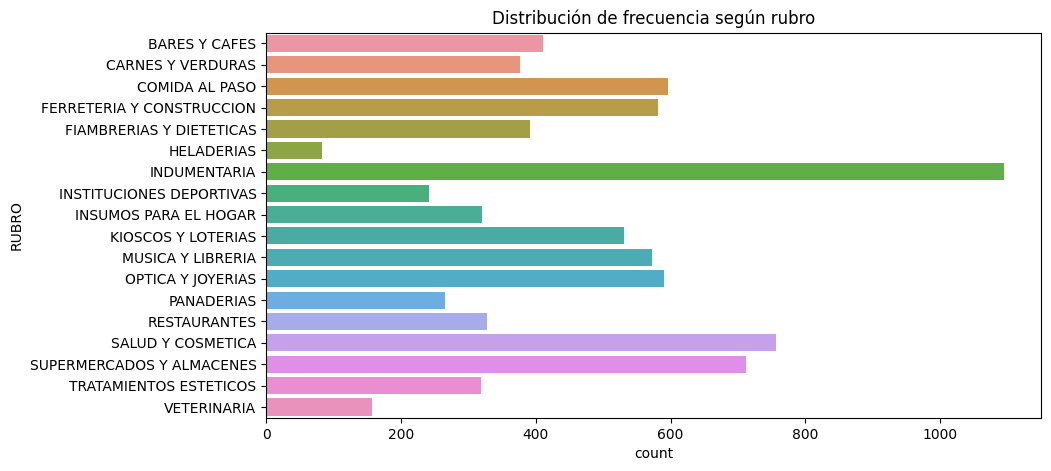

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(y='RUBRO',data=df_concatenado_cierre_aperturas)
plt.title('Distribución de frecuencia según rubro')
plt.show()

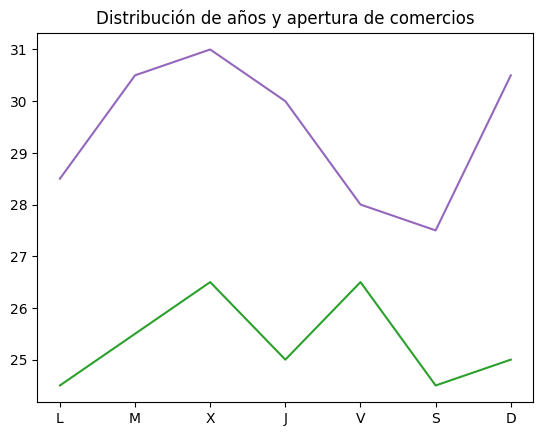

In [33]:
fig, ax = plt.subplots()
dias = ['L', 'M', 'X', 'J', 'V', 'S', 'D']
temperaturas = {'Madrid':[28.5, 30.5, 31, 30, 28, 27.5, 30.5], 'Barcelona':[24.5, 25.5, 26.5, 25, 26.5, 24.5, 25]}
ax.plot(dias, temperaturas['Madrid'], color = 'tab:purple')
ax.plot(dias, temperaturas['Barcelona'], color = 'tab:green')
plt.title('Distribución de años y apertura de comercios')
plt.show()

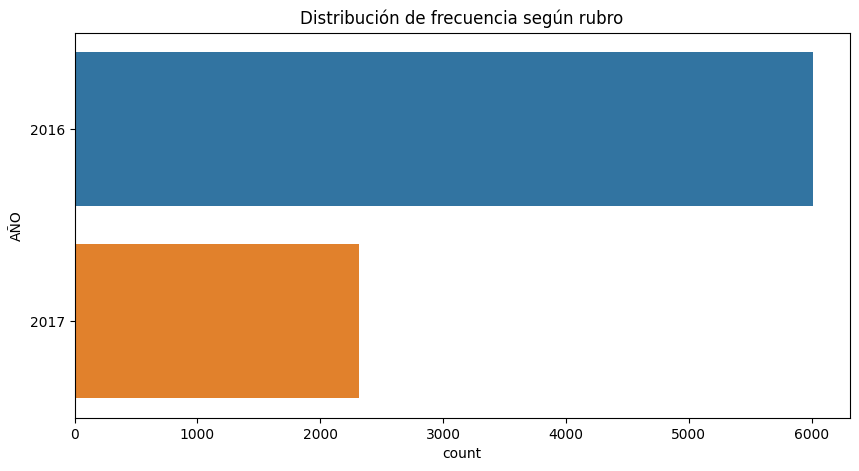

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(y='AÑO',data=df_concatenado_cierre_aperturas)
plt.title('Distribución de frecuencia según rubro')
plt.show()

------------------

In [24]:
df_cierre_aperturas = pd.merge(cierre, aperturas, how ='left', on ='RUBRO')
df_cierre_aperturas.info()
df_cierre_aperturas.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1146757 entries, 0 to 1146756
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   RUBRO           1146757 non-null  object
 1   MOC_ZONAS_ID_x  1146757 non-null  int64 
 2   AÑO_x           1146757 non-null  int64 
 3   CUATRIMESTRE_x  1146757 non-null  int64 
 4   NIVEL_x         1146757 non-null  int64 
 5   MOC_ZONAS_ID_y  1146757 non-null  int64 
 6   AÑO_y           1146757 non-null  int64 
 7   CUATRIMESTRE_y  1146757 non-null  int64 
 8   NIVEL_y         1146757 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 87.5+ MB


,RUBRO,MOC_ZONAS_ID_x,AÑO_x,CUATRIMESTRE_x,NIVEL_x,MOC_ZONAS_ID_y,AÑO_y,CUATRIMESTRE_y,NIVEL_y
0,BARES Y CAFES,4,2016,3,1,161,2016,3,1
1,BARES Y CAFES,4,2016,3,1,160,2016,1,1
2,BARES Y CAFES,4,2016,3,1,160,2016,2,1
3,BARES Y CAFES,4,2016,3,1,160,2016,3,1
4,BARES Y CAFES,4,2016,3,1,159,2016,1,1


In [23]:
df_rubros_aperturas = pd.merge(rubros, aperturas, how ='left', on ='MOC_ZONAS_ID')
df_rubros_aperturas.info()
df_rubros_aperturas.head()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 93780 entries, 0 to 93779
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MOC_RUBROS_ID                  93780 non-null  int64  
 1   MOC_ZONAS_ID                   93780 non-null  int64  
 2   RUBRO_x                        93780 non-null  object 
 3   NIVEL_RIESGO                   91514 non-null  float64
 4   FACTURACION_PROM_ACTUAL        91090 non-null  float64
 5   INDICE_CRECIMIENTO             90742 non-null  float64
 6   INDICE_ESTABILIDAD             91514 non-null  float64
 7   INDICE_APERTURA                93780 non-null  float64
 8   INDICE_CIERRE                  93780 non-null  float64
 9   INDICE_SUPERVIVENCIA           86402 non-null  float64
 10  IND_AP_ACT_VS_IND_AP_ANIO_ANT  73639 non-null  float64
 11  IND_CL_ACT_VS_IND_CL_ANIO_ANT  51751 non-null  float64
 12  SUP_MENOS_1                    92303 non-null 

,MOC_RUBROS_ID,MOC_ZONAS_ID,RUBRO_x,NIVEL_RIESGO,FACTURACION_PROM_ACTUAL,INDICE_CRECIMIENTO,INDICE_ESTABILIDAD,INDICE_APERTURA,INDICE_CIERRE,INDICE_SUPERVIVENCIA,...,SUP_ENTRE_4_Y_5,SUP_MAS_5,FACTURACION_PROM_ANIO_ANT,NIVEL_LOCALES,INDICE_CIERRE_ANIO_ANT,INDICE_APERTURA_ANIO_ANT,RUBRO_y,AÑO,CUATRIMESTRE,NIVEL
0,1,1,INSUMOS PARA EL HOGAR,5.0,1.0,3.0,1.0,0.0,16.67,0.0,...,0.0,30.0,2.0,1.0,16.67,16.67,BARES Y CAFES,2016,1,1
1,1,1,INSUMOS PARA EL HOGAR,5.0,1.0,3.0,1.0,0.0,16.67,0.0,...,0.0,30.0,2.0,1.0,16.67,16.67,COMIDA AL PASO,2016,1,1
2,1,1,INSUMOS PARA EL HOGAR,5.0,1.0,3.0,1.0,0.0,16.67,0.0,...,0.0,30.0,2.0,1.0,16.67,16.67,COMIDA AL PASO,2016,2,1
3,1,1,INSUMOS PARA EL HOGAR,5.0,1.0,3.0,1.0,0.0,16.67,0.0,...,0.0,30.0,2.0,1.0,16.67,16.67,HELADERIAS,2016,2,1
4,1,1,INSUMOS PARA EL HOGAR,5.0,1.0,3.0,1.0,0.0,16.67,0.0,...,0.0,30.0,2.0,1.0,16.67,16.67,INDUMENTARIA,2016,1,1


Bibliografía 

https://data.buenosaires.gob.ar/dataset/mapa-oportunidades-comerciales-moc